In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the leakage results CSV
leakage_results_path = 'simulation_results/res_leak_concept_methods/res_leak_concept_methods_20250211_095913.csv'
leakage_results = pd.read_csv(leakage_results_path)

# Load the mean leakage per configuration CSV
mean_leakage_path = 'simulation_results/res_leak_concept_methods/res_leak_concept_methods_mean_20250211_095913.csv'
mean_leakage = pd.read_csv(mean_leakage_path)


In [2]:
# =====================================================
# DISPLAY RESULTS
# =====================================================
print("\n=== Leakage Results ===")
print(leakage_results)



=== Leakage Results ===
    CBM_Type Training_Mode  Alpha    k  Run   Leakage  Warning  num_sim  \
0       soft         joint   0.01   25    1  0.051338    False       15   
1       soft         joint   0.01   25    2  0.096136    False       15   
2       soft         joint   0.01   25    3  0.058034    False       15   
3       soft         joint   0.01   25    4  0.075190    False       15   
4       soft         joint   0.01   25    5  0.072191    False       15   
..       ...           ...    ...  ...  ...       ...      ...      ...   
625     soft         joint   0.30  150   11  0.001824    False       15   
626     soft         joint   0.30  150   12  0.000092    False       15   
627     soft         joint   0.30  150   13  0.003071    False       15   
628     soft         joint   0.30  150   14  0.000816    False       15   
629     soft         joint   0.30  150   15  0.003437    False       15   

         n     d  
0    10000  1000  
1    10000  1000  
2    10000  1000 

In [3]:
print("\n=== Mean Leakage per Configuration ===")
print(mean_leakage)


=== Mean Leakage per Configuration ===
   CBM_Type Training_Mode  Alpha    k  num_sim      n     d   Leakage
0      soft         joint  0.010   25       15  10000  1000  0.071671
1      soft         joint  0.010   50       15  10000  1000  0.082812
2      soft         joint  0.010   75       15  10000  1000  0.072583
3      soft         joint  0.010  100       15  10000  1000  0.077405
4      soft         joint  0.010  125       15  10000  1000  0.079789
5      soft         joint  0.010  150       15  10000  1000  0.084500
6      soft         joint  0.025   25       15  10000  1000  0.071062
7      soft         joint  0.025   50       15  10000  1000  0.080763
8      soft         joint  0.025   75       15  10000  1000  0.070602
9      soft         joint  0.025  100       15  10000  1000  0.074858
10     soft         joint  0.025  125       15  10000  1000  0.077708
11     soft         joint  0.025  150       15  10000  1000  0.080398
12     soft         joint  0.050   25       15  10

In [4]:
# =====================================================
# IDENTIFY CONFIGURATIONS WITH WARNINGS
# =====================================================
problematic_configs = leakage_results[leakage_results['Warning'] == True]
print("\n=== Configurations with Gradient Warnings or Skipped ===")
if not problematic_configs.empty:
    print(problematic_configs)
else:
    print("No configurations triggered gradient warnings or were skipped.")



=== Configurations with Gradient Warnings or Skipped ===
No configurations triggered gradient warnings or were skipped.


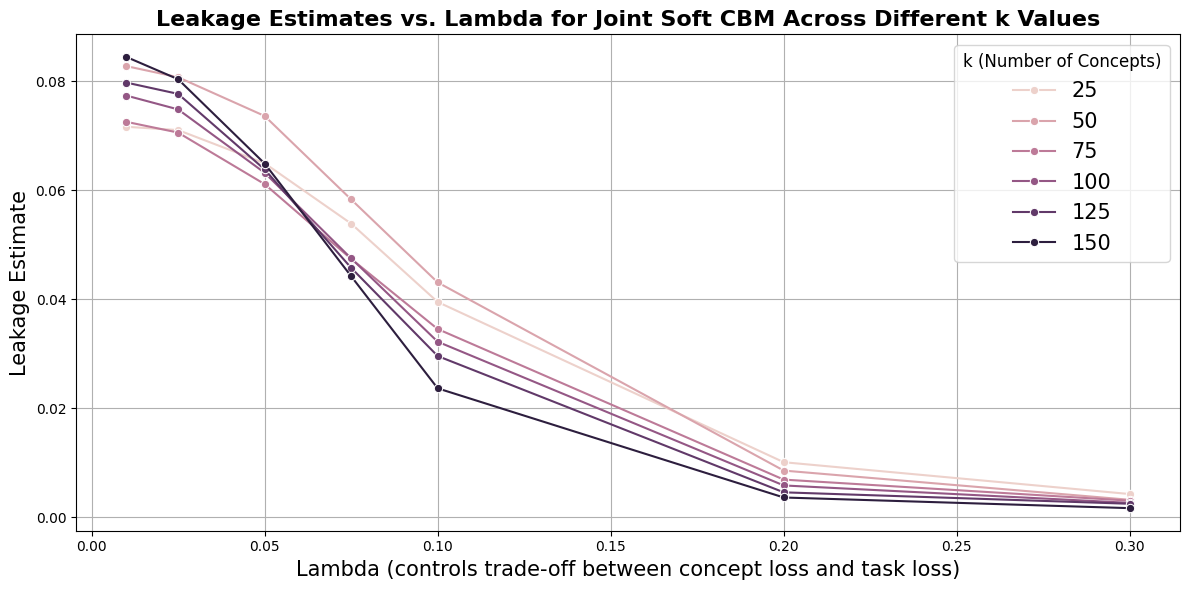

In [5]:
# =====================================================
# VISUALIZE RESULTS
# =====================================================
# 1. Leakage vs. Alpha for Joint Soft CBM across different k values
joint_soft_configs = mean_leakage[
    (mean_leakage['CBM_Type'] == 'soft') &
    (mean_leakage['Training_Mode'] == 'joint')
]

if not joint_soft_configs.empty:
    plt.figure(figsize=(12, 6))
    
    # Create line plot with markers
    sns.lineplot(data=joint_soft_configs, x='Alpha', y='Leakage', hue='k', marker='o')

    # Update formatting
    plt.title('Leakage Estimates vs. Lambda for Joint Soft CBM Across Different k Values', fontsize=16, fontweight="bold")
    plt.xlabel("Lambda (controls trade-off between concept loss and task loss)", fontsize=15)
    plt.ylabel("Leakage Estimate", fontsize=15)
    
    # Adjust legend formatting
    legend = plt.legend(title="k (Number of Concepts)", title_fontsize=12, fontsize=15)
    
    # Grid and layout adjustments
    plt.grid(True)
    plt.tight_layout()
    
    plt.show()
else:
    print("\nNo data available for Joint Soft CBM configurations to plot 'Leakage vs Alpha'.")


In [ ]:
# # 2. Leakage across All Configurations for different k values
# plt.figure(figsize=(12, 6))  # Increased plot size
# sns.boxplot(x='CBM_Type', y='Leakage', hue='Training_Mode', data=leakage_results)
# plt.title('Mean Estimated Leakage across CBM Types and Training Modes (aggregated over different lambdas and number of concepts)', 
#           fontdict={'weight': 'bold'})
# plt.xlabel('CBM Type')
# plt.ylabel('Mean Estimated Leakage')
# plt.legend(title='Training Mode')
# plt.tight_layout()
# plt.show()


In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# # Specify the desired values for k and Alpha
# k_value = 50
# alpha_value = 200

# # Filter the DataFrame:
# # 1. For joint training mode, apply the specific Alpha filter.
# # 2. For other training modes, ignore Alpha and just filter for the specified k value.
# filtered_data = leakage_results[
#     ((leakage_results['Training_Mode'] == 'joint') & (leakage_results['Alpha'] == alpha_value)) |
#     ((leakage_results['Training_Mode'] != 'joint') & (leakage_results['k'] == k_value))
# ]

# # Plot the filtered data
# plt.figure(figsize=(16, 8))
# sns.boxplot(x='CBM_Type', y='Leakage', hue='Training_Mode', data=filtered_data)
# plt.title(f'Leakage across CBM Types and Training Modes (k={k_value}, Alpha={alpha_value} for Joint)')
# plt.xlabel('CBM Type')
# plt.ylabel('Estimated Leakage')
# plt.legend(title='Training Mode')
# plt.tight_layout()
# plt.show()

In [ ]:
# # 3. Leakage across All Configurations and k values
# plt.figure(figsize=(12, 6))
# sns.scatterplot(data=mean_leakage, x='k', y='Leakage', hue='CBM_Type', style='Training_Mode', s=100)
# plt.title('Mean Estimated Leakage across CBM Types and Training Modes for Different Numbers of Concepts (Aggregated over Lambdas)', 
#           fontdict={'weight': 'bold'})
# plt.xlabel('Number of Concepts (k)')
# plt.ylabel('Mean Estimated Leakage')
# plt.legend(title='CBM Type / Training Mode')
# plt.tight_layout()
# plt.show()


In [ ]:
# # 4. Heatmap of Leakage for Joint Soft CBM
# if not joint_soft_configs.empty:
#     pivot_table = joint_soft_configs.pivot(index='k', columns='Alpha', values='Leakage')
#     plt.figure(figsize=(12, 8))
#     sns.heatmap(pivot_table, annot=True, fmt=".4f", cmap="viridis")
#     plt.xscale('log')  # Since alpha is on a log scale
#     plt.title('Heatmap of Leakage for Joint Soft CBM across Alpha and k')
#     plt.xlabel('Alpha (log scale)')
#     plt.ylabel('Number of Concepts (k)')
#     plt.tight_layout()
#     plt.show()
# else:
#     print("\nNo data available for Joint Soft CBM configurations to plot 'Leakage vs Alpha' Heatmap.")
